In [1]:
%cd ..

/Users/juansegundohevia/Documents/repos/rice-datathon-2024-chevron


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("data/training.csv", index_col=0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29692 entries, 0 to 30091
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     29692 non-null  float64
 1   surface_y                     29692 non-null  float64
 2   bh_x                          27605 non-null  float64
 3   bh_y                          27605 non-null  float64
 4   standardized_operator_name    29692 non-null  int64  
 5   gross_perforated_length       22135 non-null  float64
 6   number_of_stages              2752 non-null   float64
 7   total_proppant                19080 non-null  float64
 8   total_fluid                   19076 non-null  float64
 9   true_vertical_depth           28197 non-null  float64
 10  ffs_frac_type                 14585 non-null  object 
 11  proppant_intensity            18971 non-null  float64
 12  frac_fluid_intensity          18946 non-null  float64
 13  a

In [8]:
data.head()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,...,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,...,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,...,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [9]:
# For the following analysis, we want to avoid reviewing
data.dropna(subset=["OilPeakRate"], inplace=True)

# Univariate

## Surface

In [10]:
data.surface_x.describe() / 1e5

count     0.193060
mean     10.199936
std       1.678097
min       5.627874
25%       8.894921
50%      10.121909
75%      11.299828
max      17.282088
Name: surface_x, dtype: float64

In [8]:
data.surface_y.describe() / 1e5

count     0.193060
mean     10.848646
std       3.254882
min       4.965294
25%       8.023992
50%      10.142128
75%      13.743856
max      18.114749
Name: surface_y, dtype: float64

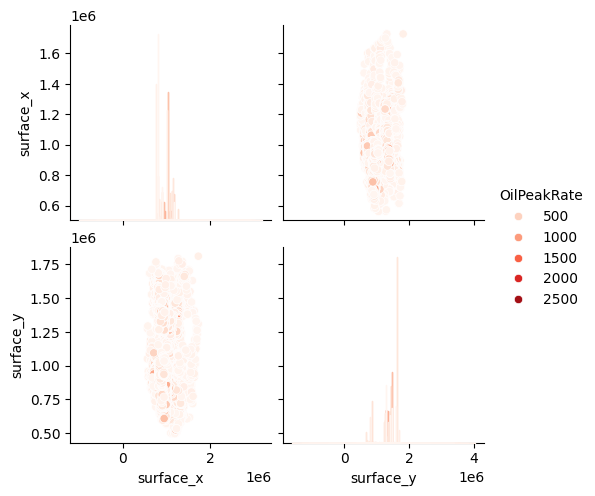

In [9]:
sns.pairplot(data[["surface_x", "surface_y", "OilPeakRate"]], hue="OilPeakRate", diag_kind="kde", palette="Reds")

/var/folders/2c/s1dc7gqn0jz4dls2kprq822m0000gn/T/ipykernel_88347/911348794.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=data, y="OilPeakRate", x="surface_y", palette="Reds")


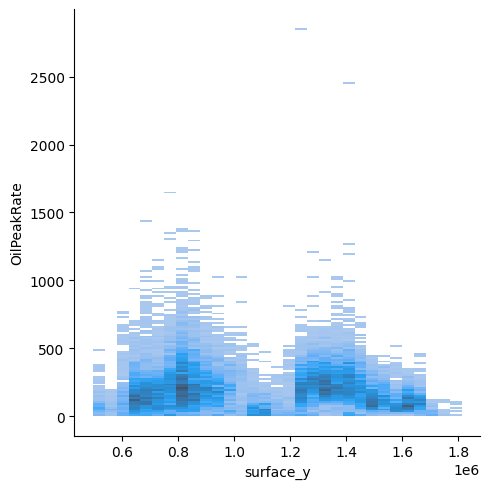

In [10]:
sns.displot(data=data, y="OilPeakRate", x="surface_y", palette="Reds")

/var/folders/2c/s1dc7gqn0jz4dls2kprq822m0000gn/T/ipykernel_88347/2302462841.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=data, y="OilPeakRate", x="surface_x", palette="Reds")


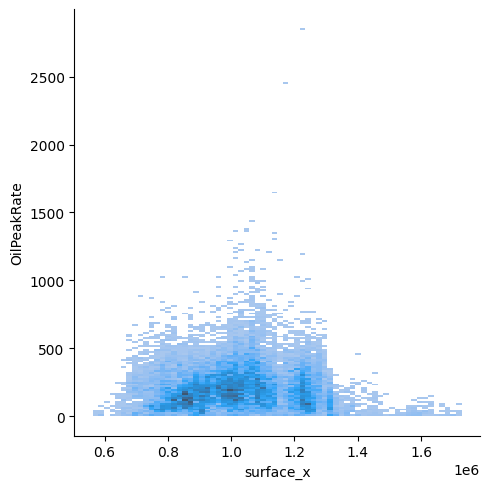

In [11]:
sns.displot(data=data, y="OilPeakRate", x="surface_x", palette="Reds")

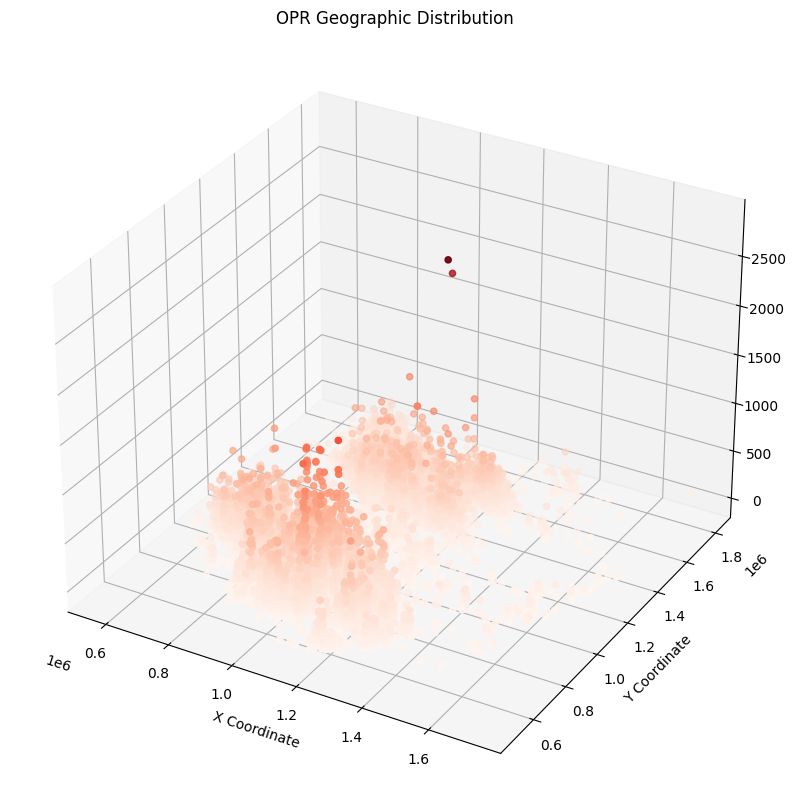

In [23]:
# Make a surface plot of surface_x and surface_y, with OilPeakRate as the z value
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.surface_x, data.surface_y, data.OilPeakRate, c=data.OilPeakRate, cmap="Reds")
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
# ax.set_zlabel("OPR")
ax.set_title("OPR Geographic Distribution")
plt.show()

<AxesSubplot:xlabel='bh_x', ylabel='bh_y'>

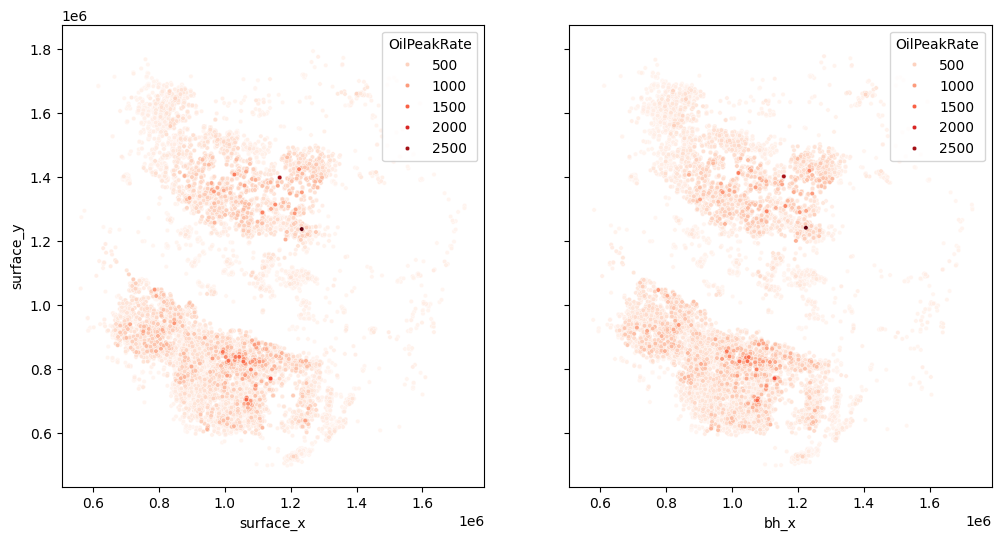

In [11]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=(12,6))
sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="surface_x",
    y="surface_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[0]
)

sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="bh_x",
    y="bh_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[1]
)

<AxesSubplot:xlabel='bh_x', ylabel='bh_y'>

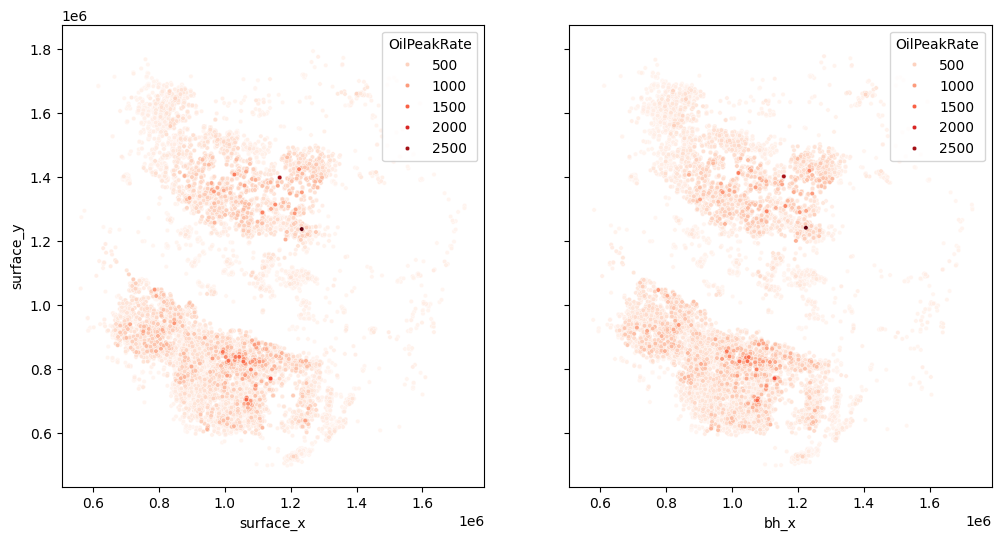

In [12]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=(12,6))
sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="surface_x",
    y="surface_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[0]
)

sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="bh_x",
    y="bh_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[1]
)

<AxesSubplot:xlabel='surface_y', ylabel='bh_y'>

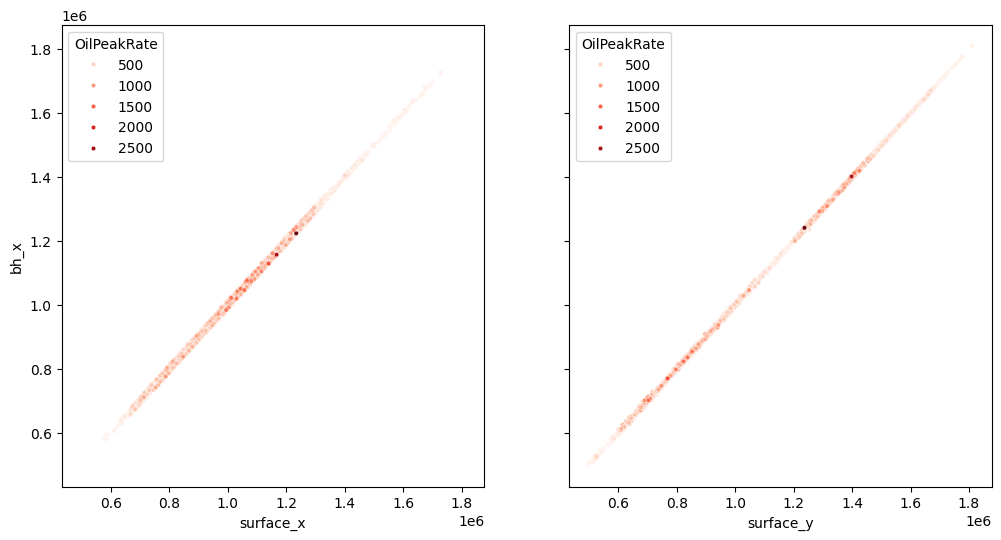

In [13]:
fig, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=(12,6))
sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="surface_x",
    y="bh_x",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[0]
)

sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="surface_y",
    y="bh_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=10,
    ax=ax[1]
)

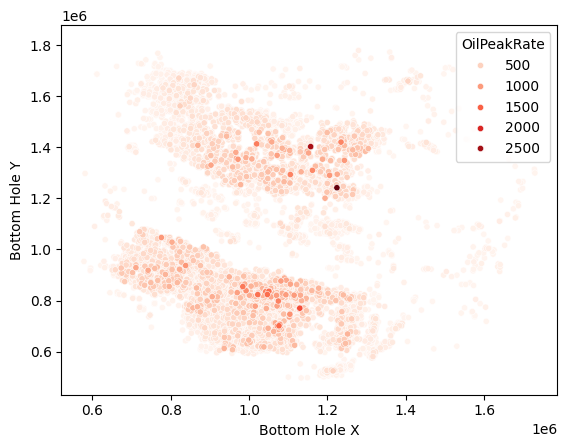

In [16]:
sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="bh_x",
    y="bh_y",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=20
)

plt.xlabel("Bottom Hole X")
plt.ylabel("Bottom Hole Y")

plt.savefig("visual/peak_rate_vs_bh.png", dpi=300)

<AxesSubplot:xlabel='bin_lateral_length', ylabel='number_of_stages'>

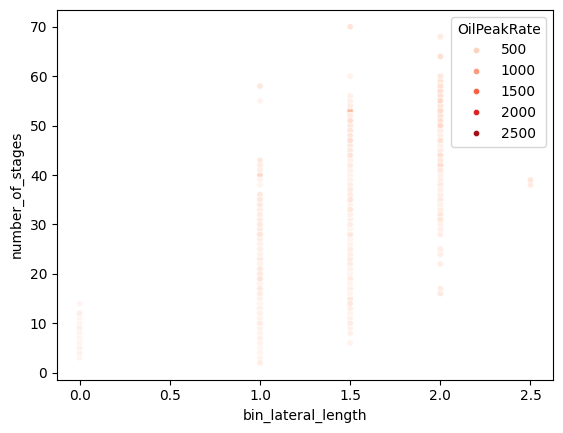

In [19]:
sns.scatterplot(
    data=data,
    y="number_of_stages",
    x="bin_lateral_length",
    hue="OilPeakRate", palette="Reds",
    # alpha=.8,
    s=20)

<AxesSubplot:xlabel='bh_x', ylabel='bh_y'>

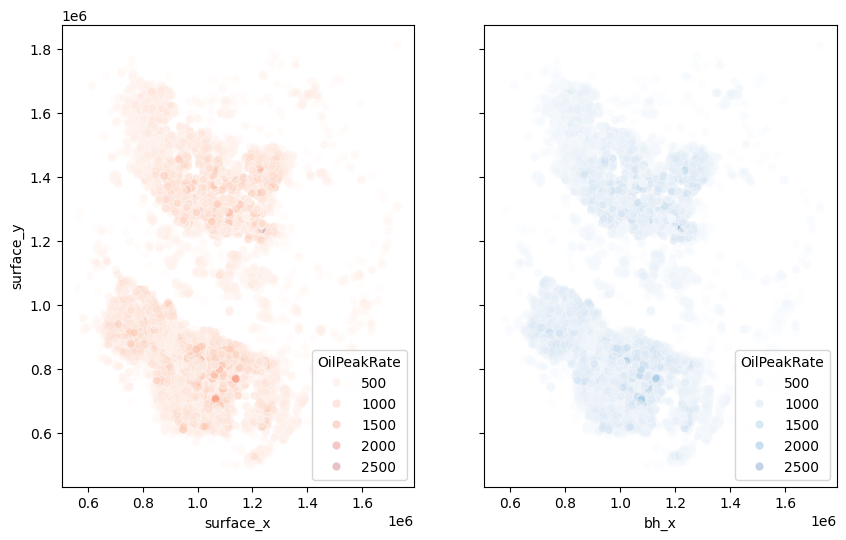

In [15]:
fig, ax = plt.subplots(1,2, figsize=(10, 6), sharex=True, sharey=True)

sns.scatterplot(
    data=data,
    x="surface_x",
    y="surface_y",
    hue="OilPeakRate", palette="Reds",
    alpha=.25,
    ax=ax[0]
)

sns.scatterplot(
    data=data,
    x="bh_x",
    y="bh_y",
    hue="OilPeakRate", palette="Blues",
    alpha=.25,
    ax=ax[1]
)

In [16]:
data.OilPeakRate.describe()

count    19306.000000
mean       219.854511
std        155.790160
min          0.011905
25%        107.918152
50%        192.767887
75%        298.073218
max       2855.469490
Name: OilPeakRate, dtype: float64

<AxesSubplot:xlabel='bh_y', ylabel='OilPeakRate'>

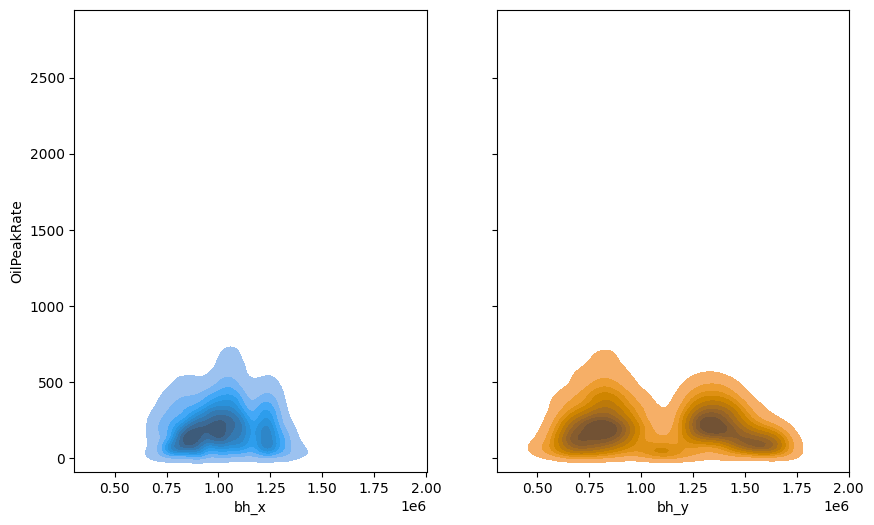

In [17]:
fig, ax = plt.subplots(1,2, figsize=(10, 6), sharex=True, sharey=True)
sns.kdeplot(
    data=data,
    y="OilPeakRate",
    x="bh_x",
    fill=True,
    ax=ax[0]
)
sns.kdeplot(
    data=data,
    y="OilPeakRate",
    x="bh_y",
    fill=True, color="orange",
    ax=ax[1]
)

In [18]:
def compute_centroid_coords(data):
    centroid_x = (data.surface_x + data.bh_x) / 2
    centroid_y = (data.surface_y + data.bh_y) / 2
    return centroid_x, centroid_y

centroid_x, centroid_y = compute_centroid_coords(data)
data["centroid_x"] = centroid_x
data["centroid_y"] = centroid_y

In [5]:
sns.scatterplot(
    data=data.sort_values("OilPeakRate", ascending=True),
    x="centroid_x",
    y="centroid_y",
    hue="OilPeakRate", palette="Reds",
    s=10
)

ValueError: Could not interpret value `centroid_x` for `x`. An entry with this name does not appear in `data`.

In [20]:
data.sample()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate,centroid_x,centroid_y
1283,1025924.793,724546.9812,1021203.696,725097.0976,1013,3491.141732,NaN,287000.0,1378268.701,10566.92913,...,Standalone Well,Primary Frac,77.0,1023058.496,725155.1512,1021253.83,725423.9323,122.253193,1.023564e+06,724822.0394


In [21]:
data.standardized_operator_name.nunique()

278

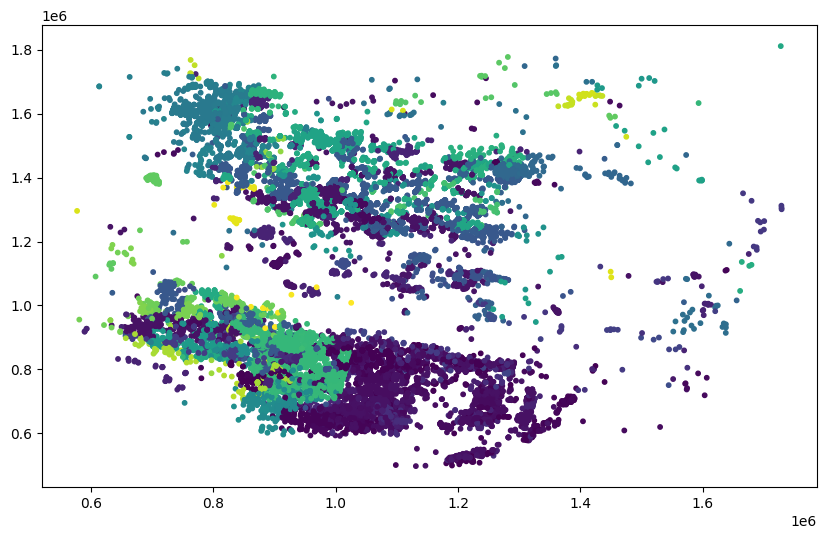

In [22]:
# create a jet colormap for the operators, of 278 colors
from matplotlib import cm
jet = cm.get_cmap("viridis", 278)

# create a dictionary mapping operator names to colors
operator_colors = {operator: jet(i) for i, operator in enumerate(data.standardized_operator_name.unique())}

# create a list of colors for each well
well_colors = [operator_colors[operator] for operator in data.standardized_operator_name]

# plot the wells
fig, ax = plt.subplots(1,1, figsize=(10, 6))
ax.scatter(
    data.centroid_x,
    data.centroid_y,
    c=well_colors,
    s=10
)

Proxy a la región.

## Perforation length

In [23]:
data.sample()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate,centroid_x,centroid_y
28422,876842.4929,924855.8409,873218.586,922523.4454,1086,3803.149606,NaN,100000.0,434635.5673,10784.44882,...,Standalone Well,Primary Frac,NaN,874707.7393,923410.0673,873219.9646,922524.5403,94.773824,875030.53945,923689.64315


<AxesSubplot:xlabel='gross_perforated_length', ylabel='OilPeakRate'>

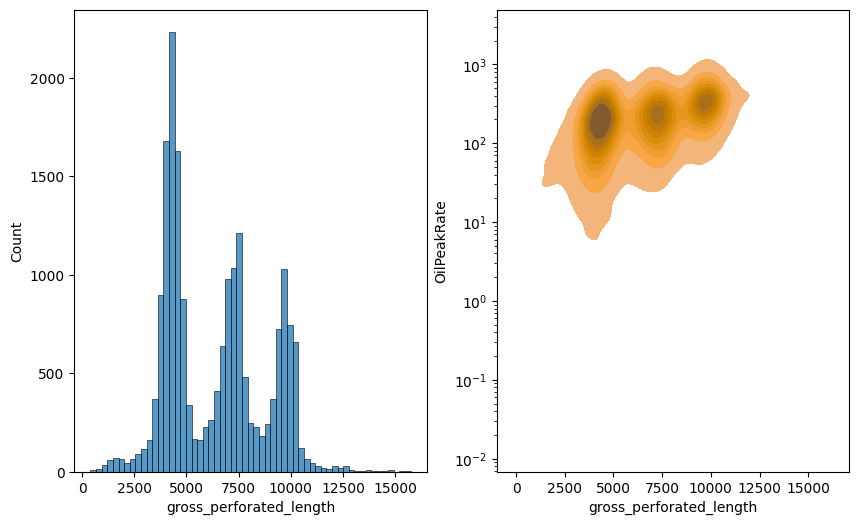

In [24]:
fig, ax = plt.subplots(1,2, figsize=(10, 6))

sns.histplot(
    data=data,
    x="gross_perforated_length",
    fill=True,
    ax=ax[0]
)

sns.kdeplot(
    data=data,
    y="OilPeakRate",
    x="gross_perforated_length",
    fill=True, color="orange",
    log_scale=(False, True),
    ax=ax[1]
)

In [25]:
data.sample()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate,centroid_x,centroid_y
16694,1214193.395,1256279.716,1222722.547,1252057.876,1344,9036.417323,NaN,NaN,NaN,8551.181102,...,Sibling Well,Primary Frac,76.0,1218863.436,1254111.463,1222940.637,1252541.649,404.583396,1218457.971,1254168.796


In [26]:
data.total_proppant.describe() / 1e5

count      0.179120
mean       7.394102
std        8.237214
min        0.000000
25%        3.445714
50%        6.772857
75%       10.442857
max      910.907335
Name: total_proppant, dtype: float64

<AxesSubplot:xlabel='bh_x', ylabel='bh_y'>

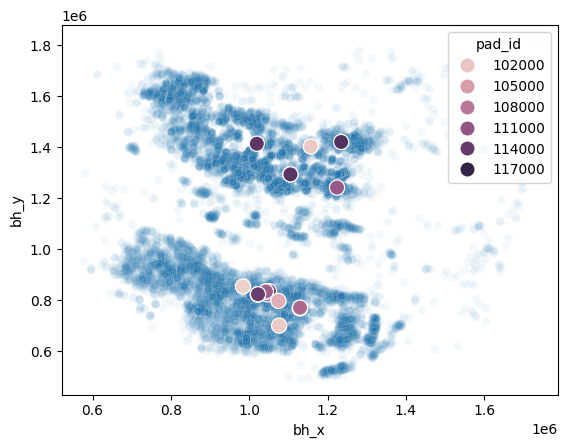

In [27]:
import matplotlib as cm

PAD_ID = 110525


sns.scatterplot(
    data=data,
    x="bh_x",
    y="bh_y",
    alpha=.05,
)
sns.scatterplot(
    data=data.loc[data.OilPeakRate > data.OilPeakRate.quantile(.999)],
    x="bh_x",
    y="bh_y",
    hue="pad_id",
    c="red",markers="x", s=120
)


In [28]:
data.loc[data.pad_id == PAD_ID].sample()[["centroid_x", "centroid_y"]]

,centroid_x,centroid_y
16924,1228908.735,1239286.866


In [29]:
PAD_ID in data.loc[data.OilPeakRate > data.OilPeakRate.quantile(.99)].pad_id.unique()

True

<AxesSubplot:xlabel='centroid_x', ylabel='centroid_y'>

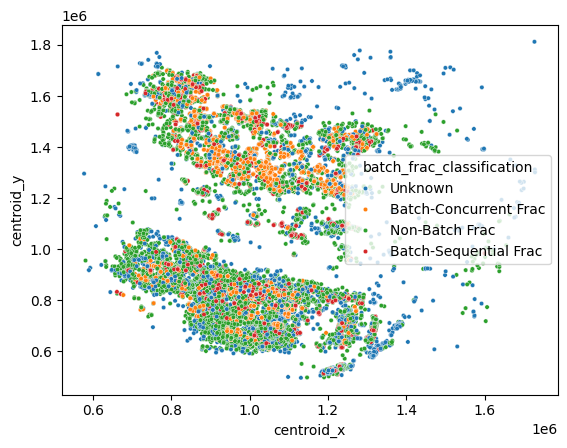

In [30]:
sns.scatterplot(
    data=data[["centroid_x", "centroid_y","relative_well_position", "batch_frac_classification", "OilPeakRate"]].sort_values("OilPeakRate", ascending=True),
    x="centroid_x",
    y="centroid_y",
    hue="batch_frac_classification",
    s=10,)

In [31]:
data.groupby(["relative_well_position", "batch_frac_classification"]).OilPeakRate.mean().sort_values(ascending=False)

relative_well_position  batch_frac_classification
Inner Well              Batch-Concurrent Frac        282.398260
                        Unknown                      280.816715
Outer Well              Batch-Concurrent Frac        273.053188
                        Batch-Sequential Frac        223.446290
                        Unknown                      221.837595
Standalone Well         Batch-Concurrent Frac        218.247441
Outer Well              Non-Batch Frac               209.121935
Standalone Well         Non-Batch Frac               202.552893
Inner Well              Batch-Sequential Frac        200.055343
                        Non-Batch Frac               198.286994
Standalone Well         Batch-Sequential Frac        197.927495
                        Unknown                      162.893877
Unknown                 Unknown                      147.689081
Name: OilPeakRate, dtype: float64

In [32]:
data.OilPeakRate.describe(percentiles=[.7,.8,.99])

count    19306.000000
mean       219.854511
std        155.790160
min          0.011905
50%        192.767887
70%        272.277225
80%        328.513940
99%        711.345428
max       2855.469490
Name: OilPeakRate, dtype: float64

In [33]:
data.groupby(["relative_well_position", "batch_frac_classification"]).OilPeakRate.mean()

relative_well_position  batch_frac_classification
Inner Well              Batch-Concurrent Frac        282.398260
                        Batch-Sequential Frac        200.055343
                        Non-Batch Frac               198.286994
                        Unknown                      280.816715
Outer Well              Batch-Concurrent Frac        273.053188
                        Batch-Sequential Frac        223.446290
                        Non-Batch Frac               209.121935
                        Unknown                      221.837595
Standalone Well         Batch-Concurrent Frac        218.247441
                        Batch-Sequential Frac        197.927495
                        Non-Batch Frac               202.552893
                        Unknown                      162.893877
Unknown                 Unknown                      147.689081
Name: OilPeakRate, dtype: float64

<AxesSubplot:ylabel='median peak oil rate'>

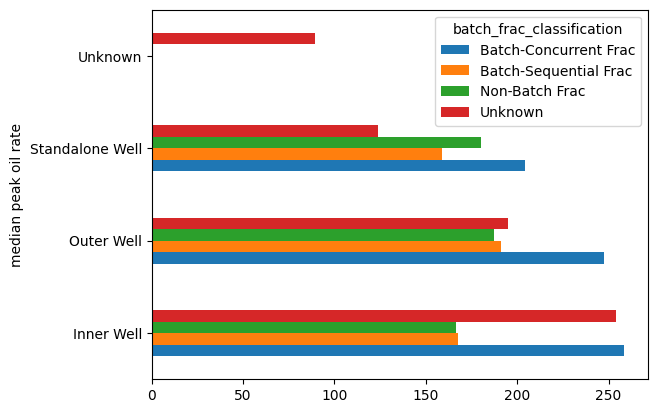

In [34]:
data.groupby(["relative_well_position", "batch_frac_classification"]).OilPeakRate.median().unstack().plot(kind="barh",
                                                                                                          xlabel="median peak oil rate")

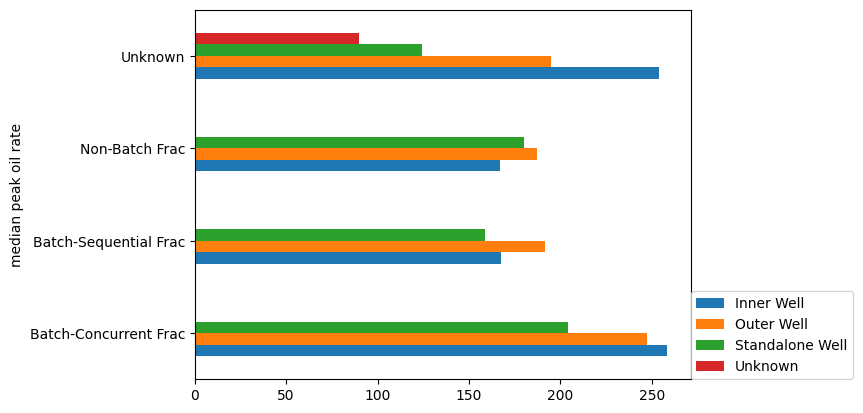

In [35]:
data.groupby(["batch_frac_classification", "relative_well_position"]).OilPeakRate.median().unstack().plot(kind="barh",
                                                                                                          xlabel="median peak oil rate")
plt.legend(loc=(1,0))

<AxesSubplot:xlabel='relative_well_position', ylabel='OilPeakRate'>

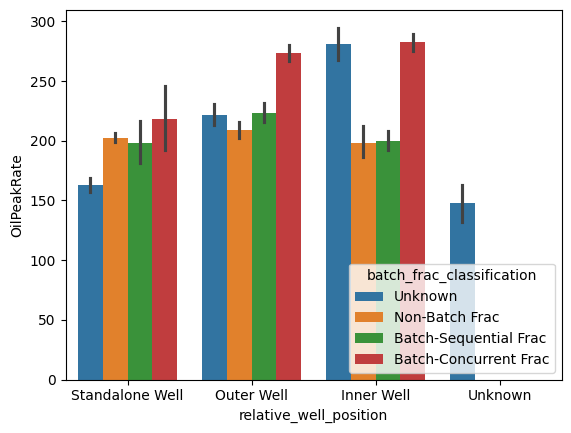

In [36]:
sns.barplot(
    data=data,
    hue="batch_frac_classification",
    y="OilPeakRate",
    x="relative_well_position",
)

In [37]:
data["codo_x"] = (data.surface_x - data.bh_x).abs()
data.codo_x.describe()

count    17882.000000
mean      6290.604866
std       2762.078170
min          0.000000
25%       4635.639775
50%       6405.415050
75%       8321.037550
max      16734.181000
Name: codo_x, dtype: float64

In [38]:
data.sample()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,...,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate,centroid_x,centroid_y,codo_x
22919,985937.5559,1508768.355,994217.5764,1506695.568,1053,7975.393701,NaN,1037000.0,3950280.052,7541.338583,...,Primary Frac,80.0,990371.1776,1507293.342,994216.5821,1506696.95,140.107165,990077.56615,1.507732e+06,8280.0205


In [39]:
data[["codo_x", "total_proppant"]].corr()

,codo_x,total_proppant
codo_x,1.000000,0.380421
total_proppant,0.380421,1.000000


In [40]:
data.codo_x.isnull().value_counts(normalize=True)

False    0.926241
True     0.073759
Name: codo_x, dtype: float64

In [41]:
data["adj_mean_proppant"] = data.apply(lambda row: row.total_proppant / row.codo_x if (row.total_proppant and row.codo_x > 0) else np.nan, axis=1)
data.adj_mean_proppant.describe()
data.adj_mean_proppant.isnull().value_counts(normalize=True)

False    0.86196
True     0.13804
Name: adj_mean_proppant, dtype: float64

In [42]:
data["adj_mean_total_fluid"] = data.apply(lambda row: row.total_fluid / row.codo_x if (row.total_fluid and row.codo_x > 0) else np.nan, axis=1)
data.adj_mean_total_fluid.describe() / 1e3
data.adj_mean_total_fluid.isnull().value_counts(normalize=True)

False    0.861494
True     0.138506
Name: adj_mean_total_fluid, dtype: float64

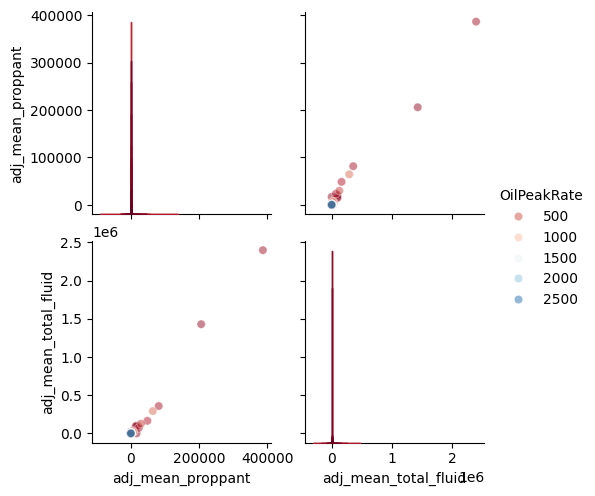

In [43]:
sns.pairplot(
    data=data[["adj_mean_proppant", "adj_mean_total_fluid", "OilPeakRate"]].sort_values("OilPeakRate", ascending=True),
    hue="OilPeakRate",
    plot_kws=dict(alpha=.5),
    palette="RdBu"
)

In [44]:
data[["average_proppant_per_stage", "adj_mean_proppant"]]

aux = data.copy()
aux.dropna(subset=["average_proppant_per_stage", "adj_mean_proppant", "number_of_stages", "adj_mean_proppant", "codo_x"], inplace=True)


x = (aux.average_proppant_per_stage * aux.number_of_stages).dropna().to_numpy()
print(x[:5], aux.total_proppant.to_list()[:5])

[286571.42856  106878.928574 140558.1429   130063.14288  100025.92857 ] [286571.4286, 106878.9286, 140558.1429, 130063.1429, 100025.9286]


In [45]:
data.codo_x.sort_values()

2180     0.0000
186      0.0000
23417    0.0000
2562     1.0240
25245    1.7779
          ...  
29391       NaN
29394       NaN
29406       NaN
29408       NaN
29422       NaN
Name: codo_x, Length: 19306, dtype: float64

In [46]:
data[["codo_x", "number_of_sta1ges"]].plot(kind="scatter", x="codo_x", y="number_of_stages")


KeyError: "['number_of_sta1ges'] not in index"

In [ ]:
sns.displot(
    data=data,
    x="adj_mean_proppant",
)

Error in callback <function flush_figures at 0x16dfa1310> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [49]:
pd.set_option("display.max_columns", 100)
data.sample()

,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate,centroid_x,centroid_y,codo_x,adj_mean_proppant,adj_mean_total_fluid
25200,703886.8565,880018.4879,713930.6697,879925.0345,1327,9285.433071,NaN,1308571.429,7781058.038,10330.70866,Slickwater Linear Hybrid,140.927345,837.985475,NaN,NaN,NaN,0.168174,5.946223,2.0,105901,Outer Well,Batch-Concurrent Frac,Sibling Well,Primary Frac,29.0,709247.8838,879576.8995,713923.6621,879978.5947,142.366292,708908.7631,879971.7612,10043.8132,130.286317,774.711545


In [79]:
data["average_stage_length"].isnull().value_counts(normalize=False)
data["average_stage_length"].describe(percentiles=np.arange(0,1,.1))

count    2620.000000
mean      250.193794
std        89.389202
min        98.747624
0%         98.747624
10%       170.784334
20%       186.840806
30%       196.229558
40%       216.522310
50%       232.701026
60%       244.296277
70%       272.994001
80%       296.021747
90%       362.541010
max       734.580053
Name: average_stage_length, dtype: float64

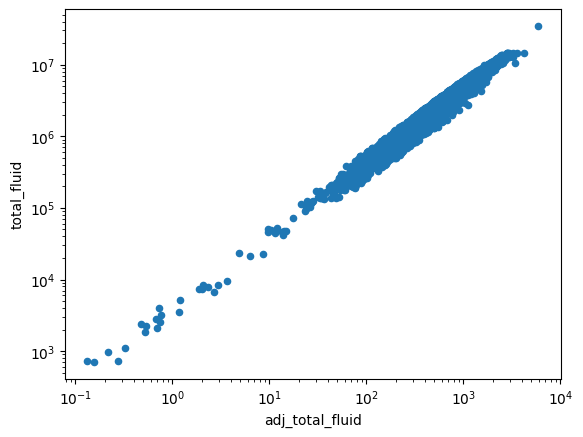

In [74]:
aux = data.copy()
aux["adj_total_fluid"] = data.frac_fluid_intensity * data.bin_lateral_length
aux.plot(kind="scatter",
    x="adj_total_fluid",
    y="total_fluid",)

# set log scales
plt.xscale("log")
plt.yscale("log")

# Data v2

In [106]:
data = pd.read_csv("data/training.csv", index_col=0)

data.dropna(subset=["OilPeakRate"], inplace=True)

data["codo_x"] = (data.surface_x - data.horizontal_toe_x).abs()
data["codo_y"] = (data.surface_y - data.horizontal_toe_y).abs()
data["codo_len"] = np.sqrt((data.surface_x - data.horizontal_toe_x).to_numpy() ** 2 + (data.surface_y - data.horizontal_toe_y).to_numpy() ** 2)

data["custom_average_proppant"] = data.total_proppant / data.codo_len




**Feature_Name**
```

surface_x
surface_y


bh_x
bh_y


gross_perforated_length
true_vertical_depth
ffs_frac_type

--
proppant_intensity
frac_fluid_intensity
--

average_stage_length

average_proppant_per_stage
average_frac_fluid_per_stage: calculadas a mano

proppant_to_frac_fluid_ratio


bin_lateral_length

relative_well_position
batch_frac_classification
well_family_relationship
frac_seasoning

- volamos todas las absolutas menos surface_x,y y dejamos
las diferencias con bh, midpoint y toe


OilPeakRate
```

In [114]:
data.proppant_intensity.isnull().value_counts()

False    17872
True      1434
Name: proppant_intensity, dtype: int64

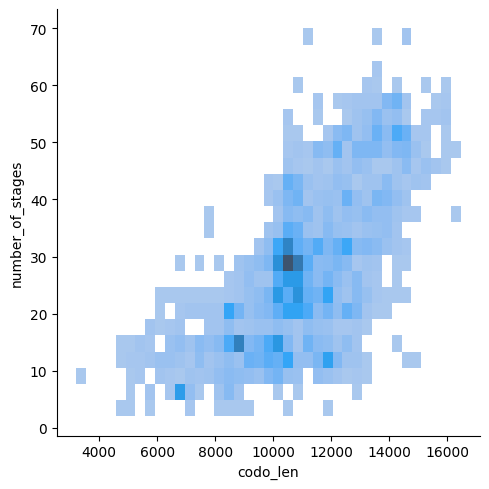

In [107]:
sns.displot(data=data,
            x="codo_len", y="number_of_stages", kind="hist",)

In [109]:
data["adj_mean_proppant"] = data.apply(lambda row: row.total_proppant / row.codo_len if (row.total_proppant and row.codo_len > 0) else np.nan, axis=1)
data["adj_mean_total_fluid"] = data.apply(lambda row: row.total_fluid / row.codo_len if (row.total_fluid and row.codo_len > 0) else np.nan, axis=1)

,adj_mean_proppant,average_proppant_per_stage
adj_mean_proppant,1.000000,0.690064
average_proppant_per_stage,0.690064,1.000000


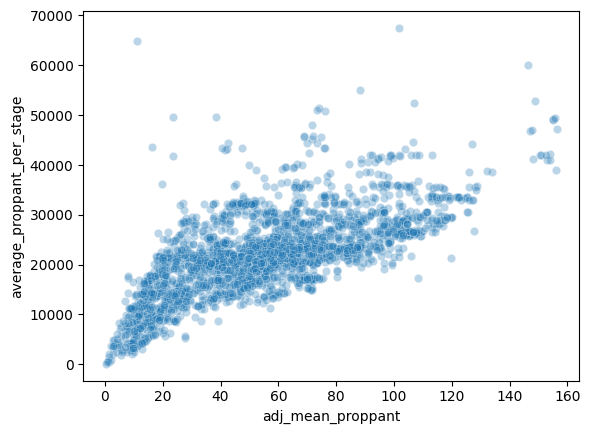

In [112]:
sns.scatterplot(
    data=data,
    x="adj_mean_proppant",
    y="average_proppant_per_stage",
    alpha=.3
)

data[["adj_mean_proppant", "average_proppant_per_stage"]].corr()

Compare differences btw BH y TOE

In [85]:
dif_bh = np.sqrt((data.surface_x - data.bh_x) ** 2 + (data.surface_y - data.bh_y) ** 2)
dif_toe = np.sqrt((data.surface_x - data.horizontal_toe_x) ** 2 + (data.surface_y - data.horizontal_toe_y) ** 2)

<AxesSubplot:xlabel='None', ylabel='None'>

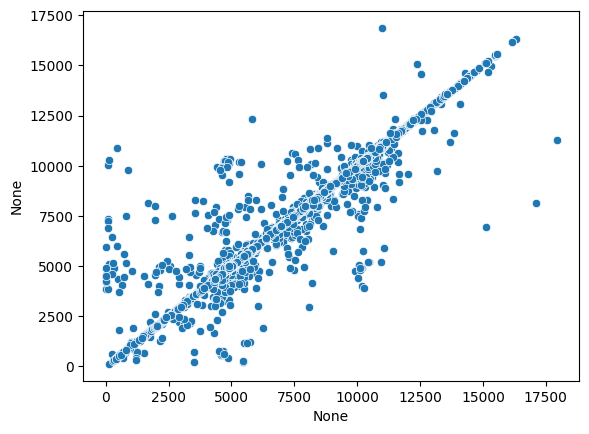

In [88]:
sns.scatterplot(x=dif_bh, y=dif_toe)

In [95]:
(dif_bh == dif_toe).value_counts(normalize=True)
pd.Series(np.isclose(dif_bh.to_numpy(), dif_toe.to_numpy(), rtol=.1)).value_counts(normalize=True)

True     0.903243
False    0.096757
dtype: float64

### TVD